In [1]:
from scopeV2.datasets.leftright_dataset import LeftRightDataset
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of 20 CT slices"""
    data = np.rot90(np.array(data))
    data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()

In [3]:
image_dataset_path = '/Users/jk1/stroke_research/SimpleVoxel-3D/leftright/data.npy'
label_path = '/Users/jk1/stroke_research/SimpleVoxel-3D/leftright/labels.csv'
ds = LeftRightDataset(image_dataset_path, label_path, validation_size=0, neg_to_pos_ratio=2)

In [4]:
ds.__len__()

75

In [5]:
sample = ds[0]
image = sample[0].numpy()
c, w, h, d = image.shape
image.shape

(1, 46, 46, 46)

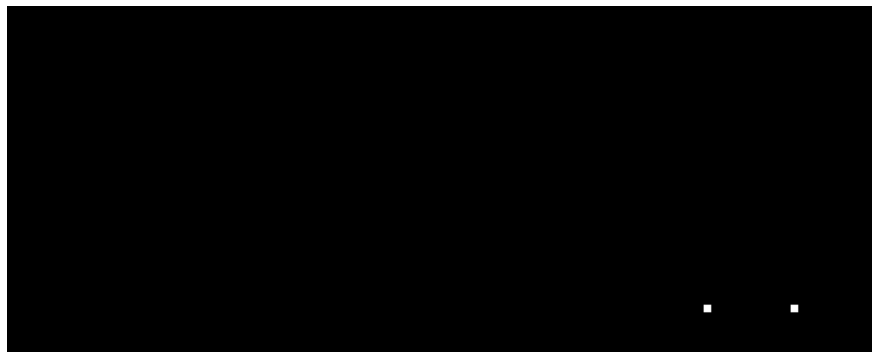

In [6]:
plot_slices(4,10, w,h, image[0, :,:,:40])


Testing balancing of dataset class

In [7]:
labels = [ds[idx][1][0] for idx in range(50)]
sum(labels)/50

tensor(0.6600)

Testing data augmentation


In [8]:
augmentation_dict = {}
augmentation_dict['flip'] = True

ds = LeftRightDataset(image_dataset_path, label_path, validation_size=0, neg_to_pos_ratio=1,
                      augmentation_dict=augmentation_dict)

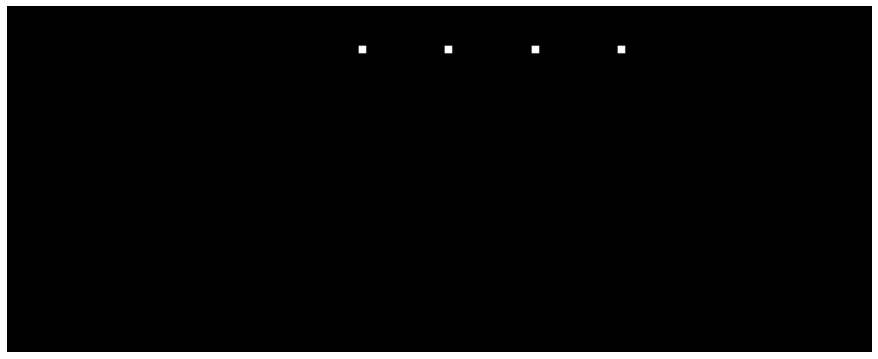

In [9]:
sample = ds[0]
image = sample[0].numpy()
c, w, h, d = image.shape
plot_slices(4,10, w,h, image[0, :,:,:40])

In [10]:
augmentation_dict = {}
augmentation_dict['offset'] = 0.1

ds = LeftRightDataset(image_dataset_path, label_path, validation_size=0, neg_to_pos_ratio=1,
                      augmentation_dict=augmentation_dict)

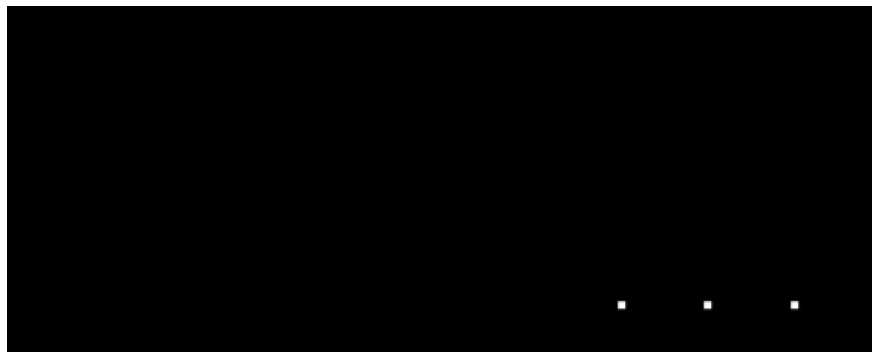

In [11]:
sample = ds[0]
image = sample[0].numpy()
c, w, h, d = image.shape
plot_slices(4,10, w,h, image[0, :,:,:40])


In [12]:
augmentation_dict = {}
augmentation_dict['scale'] = 0.2

ds = LeftRightDataset(image_dataset_path, label_path, validation_size=0, neg_to_pos_ratio=1,
                      augmentation_dict=augmentation_dict)

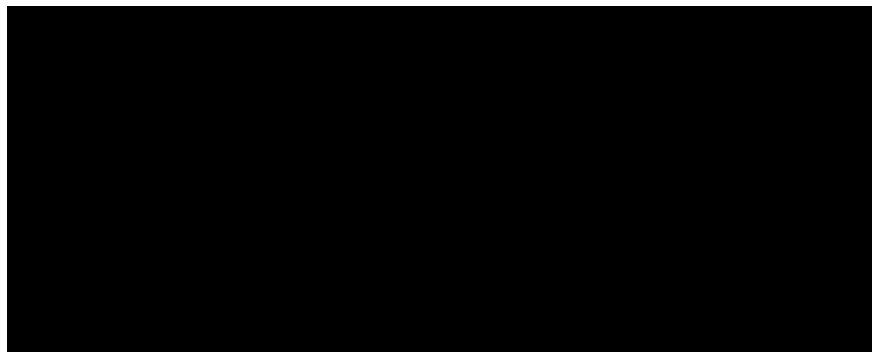

In [13]:
sample = ds[0]
image = sample[0].numpy()
c, w, h, d = image.shape
plot_slices(4,10, w,h, image[0, :,:,:40])

In [14]:

augmentation_dict = {}
augmentation_dict['rotate'] = True

ds = LeftRightDataset(image_dataset_path, label_path, validation_size=0, neg_to_pos_ratio=1,
                      augmentation_dict=augmentation_dict)

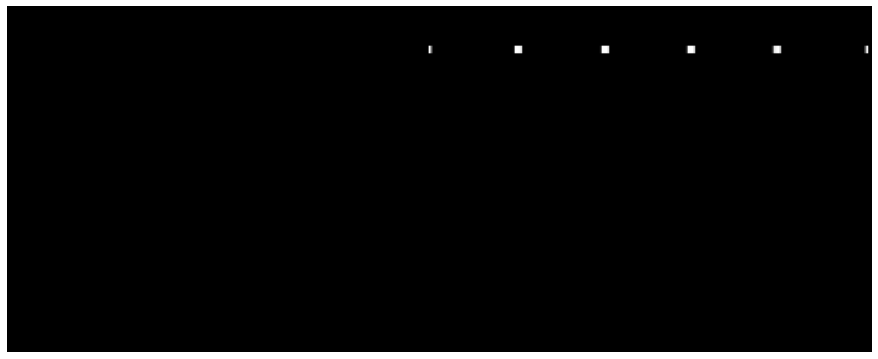

In [15]:
sample = ds[0]
image = sample[0].numpy()
c, w, h, d = image.shape
plot_slices(4,10, w,h, image[0, :,:,:40])

In [16]:
augmentation_dict = {}
augmentation_dict['noise'] = 0.25

ds = LeftRightDataset(image_dataset_path, label_path, validation_size=0, neg_to_pos_ratio=1,
                      augmentation_dict=augmentation_dict)

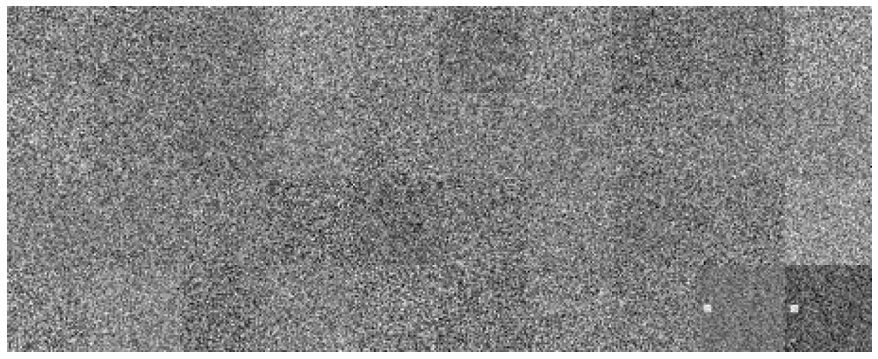

In [17]:
sample = ds[0]
image = sample[0].numpy()
c, w, h, d = image.shape
plot_slices(4,10, w,h, image[0, :,:,:40])